In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import seaborn as sns


## agulhas: load data 

In [3]:
CASE_NAME = 'agulhas/'
BASE = '/scratch/ab10313/submeso_ML_data/'
PATH = BASE+CASE_NAME

# Load all datasets
PATH_PP = PATH+'preprocessed_data/'

# submesoscale fields
UsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'UsBs_MLD_lowres.nc').isel(lon=slice(0,-3))
VsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'VsBs_MLD_lowres.nc').isel(lon=slice(0,-3))
WsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'WsBs_MLD_lowres.nc').isel(lon=slice(0,-3))

# buoyancy gradients
Bm_x_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_x_MLD_lowres.nc').isel(lon=slice(0,-3))
Bm_y_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_y_MLD_lowres.nc').isel(lon=slice(0,-3))
Bm_z_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_z_MLD_lowres.nc').isel(lon=slice(0,-3))

# mesoscale fields
Bm_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_MLD_lowres.nc').isel(lon=slice(0,-3))
Um_MLD_lowres = xr.open_dataarray(PATH_PP+'Um_MLD_lowres.nc').isel(lon=slice(0,-3))
Vm_MLD_lowres = xr.open_dataarray(PATH_PP+'Vm_MLD_lowres.nc').isel(lon=slice(0,-3))
Wm_MLD_lowres = xr.open_dataarray(PATH_PP+'Wm_MLD_lowres.nc').isel(lon=slice(0,-3))



# combine datasets
grad_b = xr.concat([Bm_x_MLD_lowres, Bm_y_MLD_lowres, Bm_z_MLD_lowres],"axis")
fluxes = xr.concat([UsBs_MLD_lowres, VsBs_MLD_lowres, WsBs_MLD_lowres],"axis")


# residual flux
F_res=  xr.DataArray(data=[fluxes[0]*grad_b[0]+fluxes[1]*grad_b[1]+ fluxes[2]*grad_b[2]],
                     dims=["axis", "time", "lat","lon"],
                     coords=dict(
                         lon=fluxes.lon,
                         lat=fluxes.lat,
                         time=fluxes.time,
    ),)
F_res_mag = np.divide(np.absolute(F_res),np.sqrt(xr.dot(grad_b, grad_b,dims="axis")))



# skew flux
F_skew= xr.DataArray(data=[fluxes[1]*grad_b[2]-fluxes[2]*grad_b[1], fluxes[2]*grad_b[0]-fluxes[0]*grad_b[2],
                           fluxes[0]*grad_b[1]-fluxes[1]*grad_b[0]],
                     dims=["axis", "time", "lat","lon"],
                     coords=dict(
                         axis=[0,1,2],
                         lon=fluxes.lon,
                         lat=fluxes.lat,
                         time=fluxes.time,
    ),)
F_skew_mag = np.divide(np.sqrt(xr.dot(F_skew, F_skew,dims="axis")),np.sqrt(xr.dot(grad_b, grad_b,dims="axis")))


# total fluxes magnitude
fluxes_mag = np.sqrt(xr.dot(fluxes, fluxes,dims="axis"))

Bm_mag = np.sqrt(xr.dot(Bm_MLD_lowres, Bm_MLD_lowres,dims="axis"))



# Skew and Residual

# Visualize

Text(0.5, 1.0, 'WsBs')

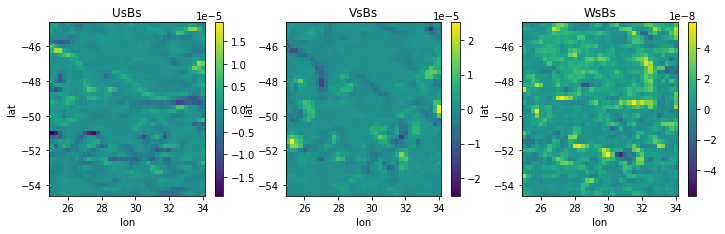

In [3]:
# visualize fluxes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
UsBs_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('UsBs')

plt.subplot(132)
VsBs_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('VsBs')

plt.subplot(133)
WsBs_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('WsBs')

Text(0.5, 1.0, 'Bm_z')

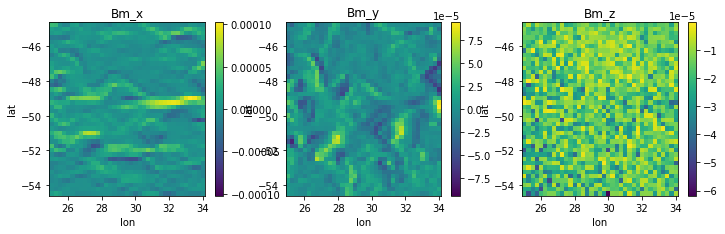

In [4]:
# visualize b grads
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
Bm_y_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm_x')

plt.subplot(132)
Bm_x_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm_y')

plt.subplot(133)
Bm_z_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm_z')

Text(0.5, 1.0, 'Bm')

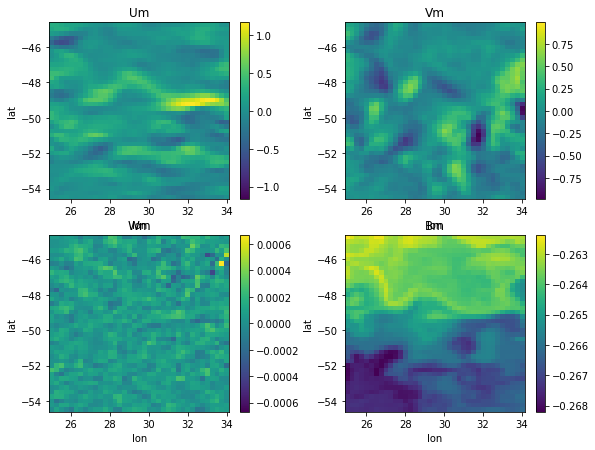

In [5]:
# visualize meso
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
Um_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Um')

plt.subplot(222)
Vm_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Vm')

plt.subplot(223)
Wm_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Wm')

plt.subplot(224)
Bm_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm')

F_skew = $$|Flux \times \grad b|/ |\grad b|$$

F_res = $$|Flux \cdot \grad b|/ |\grad b|$$

Flux is total flux vector

Text(0.5, 1.0, 'residual')

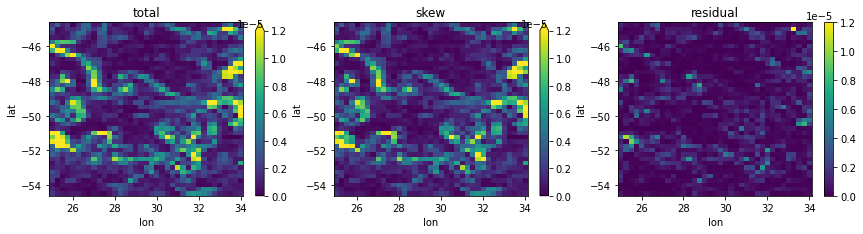

In [6]:
# visualize
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
fluxes_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('total')

plt.subplot(132)
F_skew_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('skew')


plt.subplot(133)
F_res_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('residual')

Text(0.5, 1.0, 'skew+res-total')

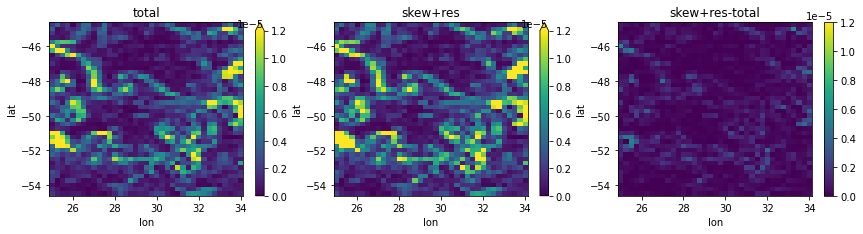

In [62]:
# visualize SANITY CHECK
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
fluxes_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('total')

plt.subplot(132)
(F_skew_mag.isel(time=0)+F_res_mag.isel(time=0)).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('skew+res')

plt.subplot(133)
(F_skew_mag.isel(time=0)+F_res_mag.isel(time=0)-fluxes_mag.isel(time=0)).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('skew+res-total')

In [ ]:
# visualize horizontal average 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
fluxes_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('total')

plt.subplot(132)
F_skew_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('skew')


plt.subplot(133)
F_res_mag.isel(time=0).plot(vmin=0,vmax=1.2e-5,cmap='viridis')
plt.title('residual')

In [55]:
# percentage compared with total fluxes

perc_skew_total = F_skew_mag/fluxes_mag
perc_res_total = F_res_mag/fluxes_mag

perc_total_total = perc_skew_total + perc_res_total

# seaborn tests

Text(0.5, 1.0, 'correlation: residual/Bm')

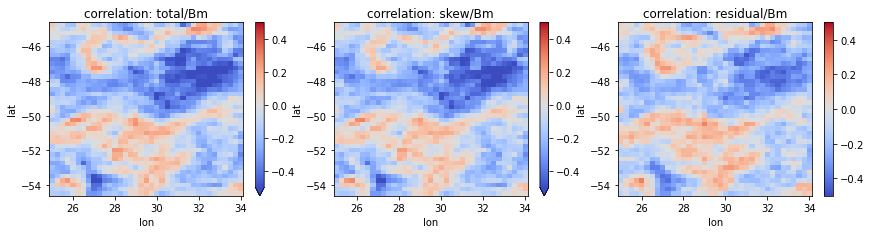

In [15]:
from scipy.stats import pearsonr

corr_fluxes_Bm = xr.corr(fluxes_mag, Bm_mag,dim='time')
corr_skew_Bm = xr.corr(F_skew_mag, Bm_mag,dim='time')
corr_res_Bm = xr.corr(F_res_mag, Bm_mag,dim='time')

# visualize
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
corr_fluxes_Bm.plot(vmin=-0.5,vmax=0.5,cmap="coolwarm")
plt.title('correlation: total/Bm')

plt.subplot(132)
corr_skew_Bm.plot(vmin=-0.5,vmax=0.5,cmap="coolwarm")
plt.title('correlation: skew/Bm')


plt.subplot(133)
corr_res_Bm.plot(vmin=-0.5,vmax=0.5,cmap="coolwarm")
plt.title('correlation: residual/Bm')

In [56]:
# group by seasons

fluxes_seasons = fluxes.groupby("time.season")
F_skew_mag_seasons = F_skew_mag.groupby("time.season")
F_res_mag_seasons = F_res_mag.groupby("time.season")

UsBs_seasons = UsBs_MLD_lowres.groupby("time.season")
VsBs_seasons = VsBs_MLD_lowres.groupby("time.season")
WsBs_seasons = WsBs_MLD_lowres.groupby("time.season")

Bm_x_seasons = Bm_x_MLD_lowres.groupby("time.season")
Bm_y_seasons = Bm_y_MLD_lowres.groupby("time.season")
Bm_z_seasons = Bm_z_MLD_lowres.groupby("time.season")

Bm_seasons = Bm_MLD_lowres.groupby("time.season")
Um_seasons = Um_MLD_lowres.groupby("time.season")
Vm_seasons = Vm_MLD_lowres.groupby("time.season")
Wm_seasons = Wm_MLD_lowres.groupby("time.season")

Bm_mag_seasons = Bm_mag.groupby("time.season")
fluxes_mag_seasons = fluxes_mag.groupby("time.season")

perc_skew_total_seasons = perc_skew_total.groupby("time.season")
perc_res_total_seasons = perc_res_total.groupby("time.season")

perc_total_total_seasons = perc_total_total.groupby("time.season")

# variability 

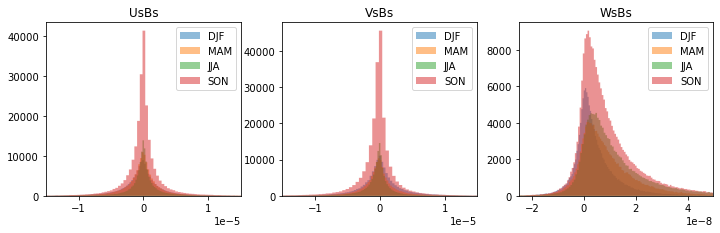

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
plt.title('UsBs')
_=plt.hist(UsBs_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(UsBs_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(UsBs_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(UsBs_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1.5e-5,1.5e-5)
plt.legend()

plt.subplot(132)
plt.title('VsBs')
_=plt.hist(VsBs_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(VsBs_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(VsBs_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(VsBs_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1.5e-5,1.5e-5)
plt.legend()

plt.subplot(133)
plt.title('WsBs')
_=plt.hist(WsBs_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-2.5e-8,5e-8)
_=plt.hist(WsBs_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-2.5e-8,5e-8)
_=plt.hist(WsBs_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-2.5e-8,5e-8)
_=plt.hist(WsBs_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-2.5e-8,5e-8)
plt.legend()


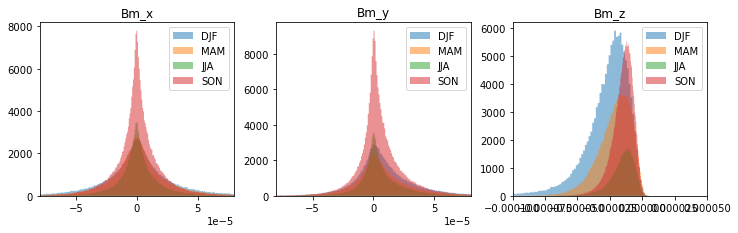

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
plt.title('Bm_x')
_=plt.hist(Bm_x_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_x_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_x_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_x_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-5,8e-5)
plt.legend()

plt.subplot(132)
plt.title('Bm_y')
_=plt.hist(Bm_y_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_y_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_y_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_y_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-5,8e-5)
plt.legend()

plt.subplot(133)
plt.title('Bm_z')
_=plt.hist(Bm_z_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1e-1,5e-5)
_=plt.hist(Bm_z_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1e-4,5e-5)
_=plt.hist(Bm_z_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1e-4,5e-5)
_=plt.hist(Bm_z_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1e-4,5e-5)
plt.legend()


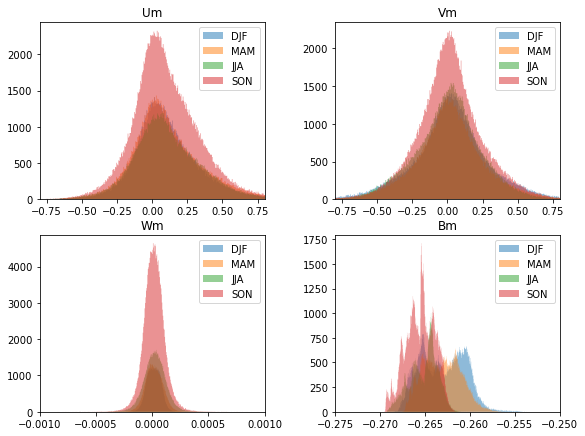

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
plt.title('Um')
_=plt.hist(Um_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Um_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Um_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Um_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-1,8e-1)
plt.legend()

plt.subplot(222)
plt.title('Vm')
_=plt.hist(Vm_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Vm_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Vm_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Vm_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-1,8e-1)
plt.legend()

plt.subplot(223)
plt.title('Wm')
_=plt.hist(Wm_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1e-3,1e-3)
_=plt.hist(Wm_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1e-3,1e-3)
_=plt.hist(Wm_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1e-3,1e-3)
_=plt.hist(Wm_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1e-3,1e-3)
plt.legend()

plt.subplot(224)
plt.title('Bm')
_=plt.hist(Bm_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-2.75e-1,-2.5e-1)
_=plt.hist(Bm_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-2.75e-1,-2.5e-1)
_=plt.hist(Bm_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-2.75e-1,-2.5e-1)
_=plt.hist(Bm_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-2.75e-1,-2.5e-1)
plt.legend()


# Skew vs residual fluxes by seasons

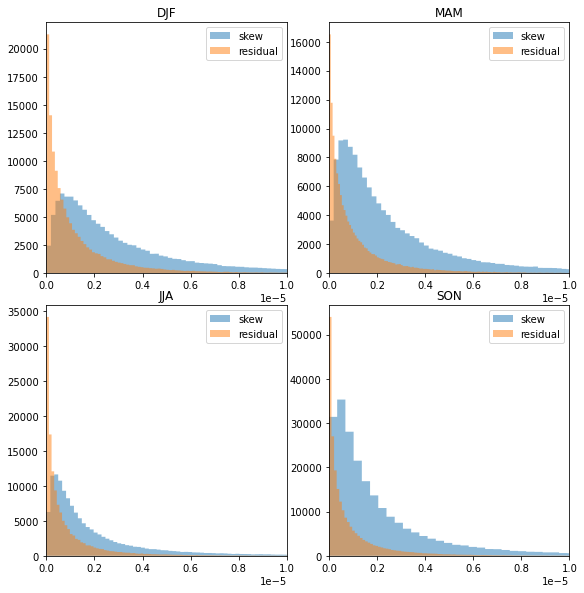

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
plt.title('DJF')
#_=plt.hist(fluxes_season["DJF"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(F_skew_mag_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(F_res_mag_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

plt.subplot(222)
plt.title('MAM')
#_=plt.hist(fluxes_season["MAM"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(F_skew_mag_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(F_res_mag_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

plt.subplot(223)
plt.title('JJA')
#_=plt.hist(fluxes_season["JJA"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(F_skew_mag_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(F_res_mag_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

plt.subplot(224)
plt.title('SON')
#_=plt.hist(fluxes_season["SON"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(F_skew_mag_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(F_res_mag_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

Text(0.5, 1.0, 'skew/total: SON')

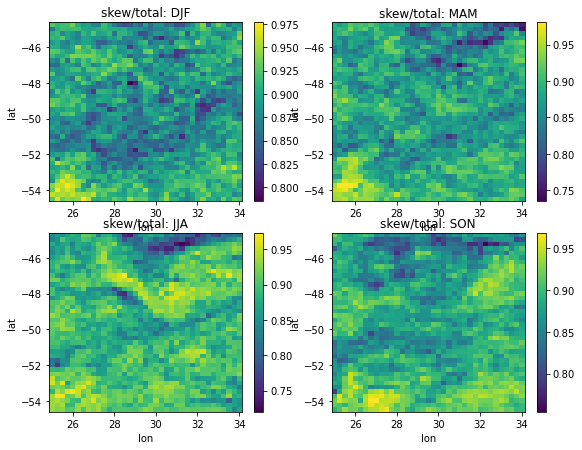

In [52]:
# visualize of average seasonal percentage of skew/res of total flux
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
perc_skew_total_seasons["DJF"].mean('time').plot(cmap='viridis')
plt.title('skew/total: DJF')

plt.subplot(222)
perc_skew_total_seasons["MAM"].mean('time').plot(cmap='viridis')
plt.title('skew/total: MAM')

plt.subplot(223)
perc_skew_total_seasons["JJA"].mean('time').plot(cmap='viridis')
plt.title('skew/total: JJA')

plt.subplot(224)
perc_skew_total_seasons["SON"].mean('time').plot(cmap='viridis')
plt.title('skew/total: SON')


Text(0.5, 1.0, 'res/total: SON')

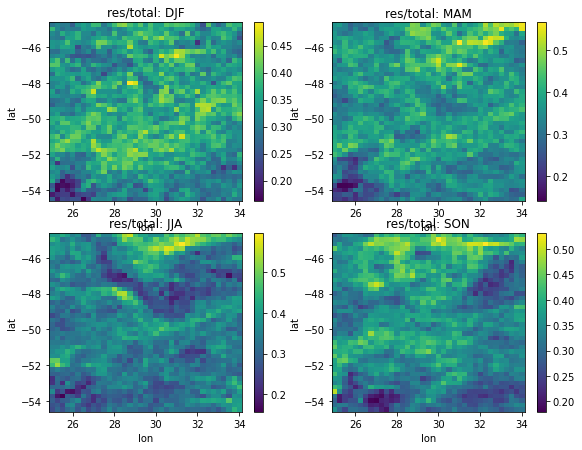

In [53]:
# visualize of average seasonal percentage of skew/res of total flux
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
perc_res_total_seasons["DJF"].mean('time').plot(cmap='viridis')
plt.title('res/total: DJF')

plt.subplot(222)
perc_res_total_seasons["MAM"].mean('time').plot(cmap='viridis')
plt.title('res/total: MAM')

plt.subplot(223)
perc_res_total_seasons["JJA"].mean('time').plot(cmap='viridis')
plt.title('res/total: JJA')

plt.subplot(224)
perc_res_total_seasons["SON"].mean('time').plot(cmap='viridis')
plt.title('res/total: SON')


Text(0.5, 1.0, 'total/total: SON')

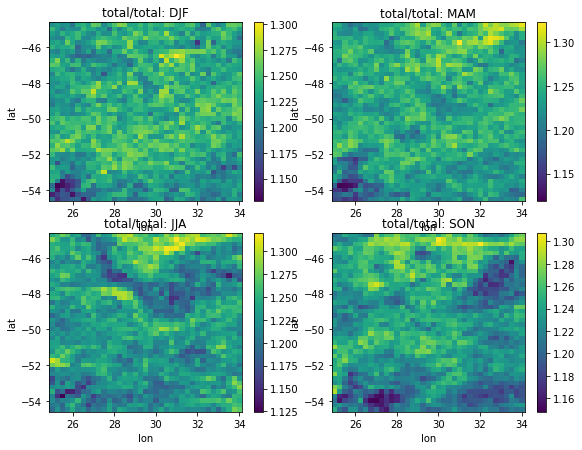

In [57]:
# visualize of average seasonal percentage of skew/res of total flux
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

#SANITY CHECK

plt.subplot(221)
perc_total_total_seasons["DJF"].mean('time').plot(cmap='viridis')
plt.title('total/total: DJF')

plt.subplot(222)
perc_total_total_seasons["MAM"].mean('time').plot(cmap='viridis')
plt.title('total/total: MAM')

plt.subplot(223)
perc_total_total_seasons["JJA"].mean('time').plot(cmap='viridis')
plt.title('total/total: JJA')

plt.subplot(224)
perc_total_total_seasons["SON"].mean('time').plot(cmap='viridis')
plt.title('total/total: SON')


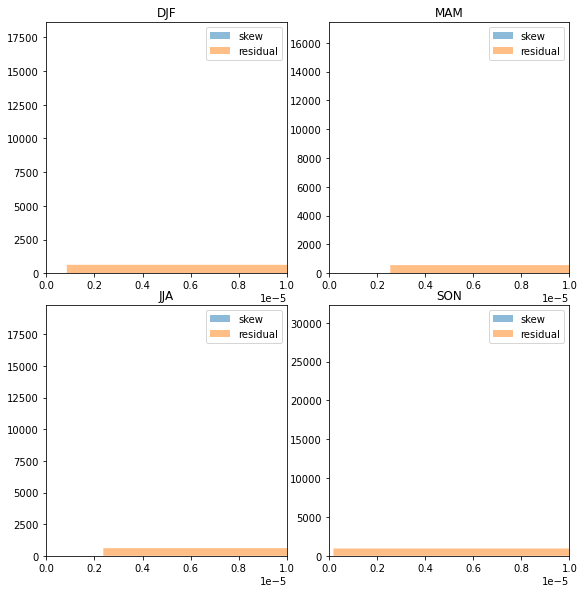

In [28]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
plt.title('DJF')
#_=plt.hist(fluxes_season["DJF"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_skew_total_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_res_total_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

plt.subplot(222)
plt.title('MAM')
#_=plt.hist(fluxes_season["MAM"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_skew_total_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_res_total_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

plt.subplot(223)
plt.title('JJA')
#_=plt.hist(fluxes_season["JJA"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_skew_total_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_res_total_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

plt.subplot(224)
plt.title('SON')
#_=plt.hist(fluxes_season["SON"].to_numpy().flatten(),bins=500,label="total")
#plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_skew_total_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="skew")
plt.xlim(-1e-8,1e-5)
_=plt.hist(perc_res_total_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="residual")
plt.xlim(-1e-8,1e-5)
plt.legend()

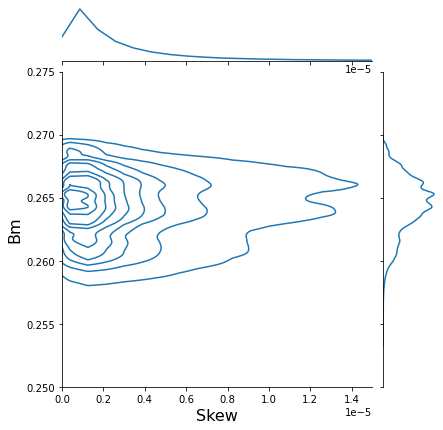

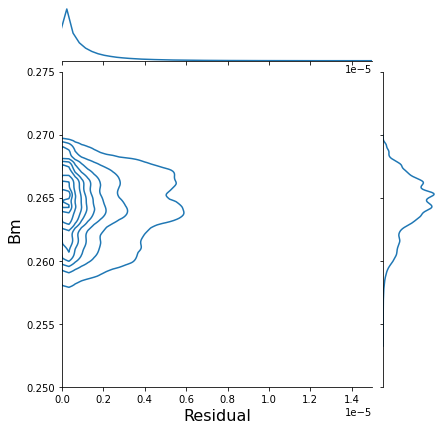

In [13]:
h= sns.jointplot(x=F_skew_mag.to_numpy().flatten(), y=Bm_mag.to_numpy().flatten(), kind='kde', xlim=[0,1.5e-5],ylim=[2.5e-1,2.75e-1])
h.set_axis_labels('Skew', 'Bm', fontsize=16)

h= sns.jointplot(x=F_res_mag.to_numpy().flatten(), y=Bm_mag.to_numpy().flatten(), kind='kde', xlim=[0,1.5e-5],ylim=[2.5e-1,2.75e-1])
h.set_axis_labels('Residual', 'Bm', fontsize=16)


## Input

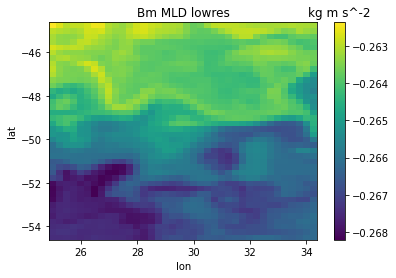

In [58]:
plt.pcolor(lat_lowres[:-2],lon_lowres[:],Bm_MLD_lowres[0,:,:-2])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg m s^-2')
plt.title('Bm MLD lowres')
plt.savefig(PATH_SNAP+'figures/Bm_MLD_lowres.png')

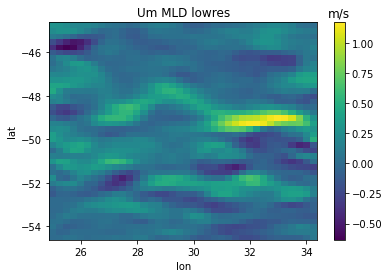

In [60]:
plt.pcolor(lat_lowres[:-2],lon_lowres[:],Um_MLD_lowres[0,:,:-2])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Um MLD lowres')
plt.savefig(PATH_SNAP+'figures/Um_MLD_lowres.png')

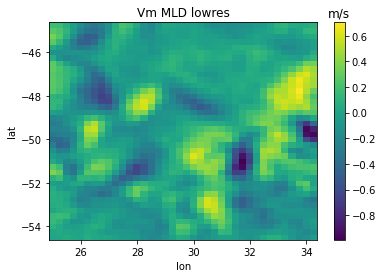

In [68]:
plt.pcolor(lat_lowres[:-2],lon_lowres[:],Vm_MLD_lowres[0,:,:-2])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Vm MLD lowres')
plt.savefig(PATH_SNAP+'figures/Vm_MLD_lowres.png')

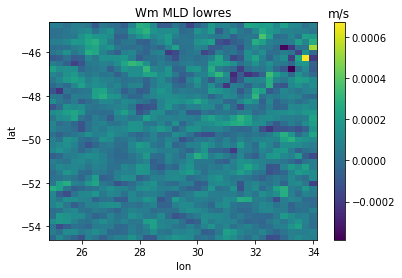

In [75]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],Wm_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Wm MLD lowres')
plt.savefig(PATH_SNAP+'figures/Wm_MLD_lowres.png')

## Output

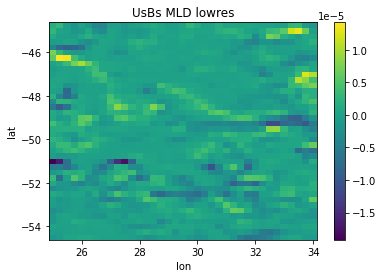

In [5]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],UsBs_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('UsBs MLD lowres')
plt.savefig(PATH_SNAP+'figures/UsBs_MLD_lowres.png')

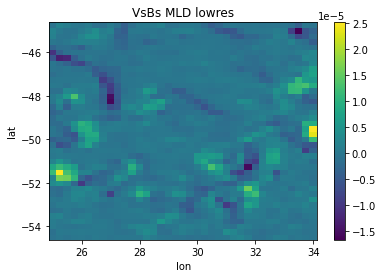

In [4]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],VsBs_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('VsBs MLD lowres')
plt.savefig(PATH_SNAP+'figures/VsBs_MLD_lowres.png')

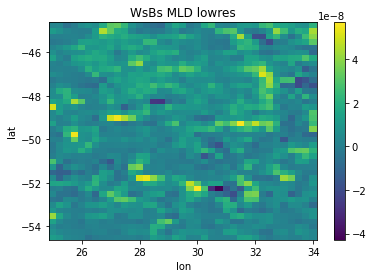

In [3]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],WsBs_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('WsBs MLD lowres')
plt.savefig(PATH_SNAP+'figures/WsBs_MLD_lowres.png')

## Loss

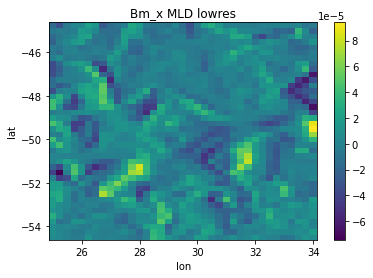

In [87]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],Bm_x_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Bm_x MLD lowres')
plt.savefig(PATH_SNAP+'figures/Bm_x_MLD_lowres.png')

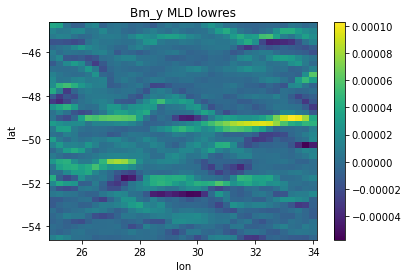

In [90]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],Bm_y_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Bm_y MLD lowres')
plt.savefig(PATH_SNAP+'figures/Bm_y_MLD_lowres.png')

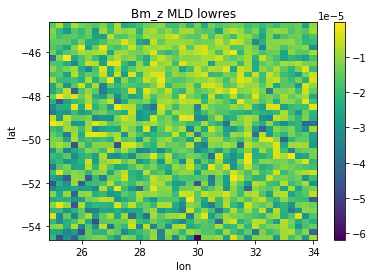

In [4]:
plt.pcolor(lat_lowres[:-3],lon_lowres[:],Bm_z_MLD_lowres[0,:,:-3])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Bm_z MLD lowres')
plt.savefig(PATH_SNAP+'figures/Bm_z_MLD_lowres.png')

# Previous preprocessing steps: example for single snapshot

## Full high resolution fields

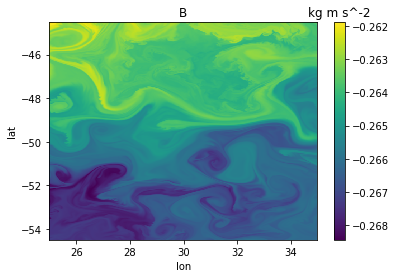

In [50]:
B = np.load(PATH_SNAP+'B.npy')
plt.pcolor(lon,lat,B)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg m s^-2')
plt.title('B')
plt.savefig(PATH_SNAP+'figures/B.png')

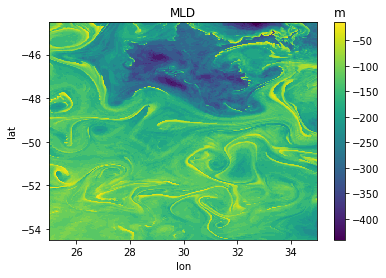

In [51]:
MLD = np.load(PATH_SNAP+'MLD.npy')
plt.pcolor(lon,lat,MLD)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m')
plt.title('MLD')
plt.savefig(PATH_SNAP+'figures/MLD.png')

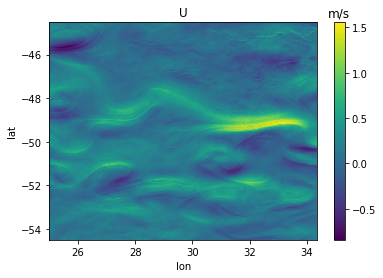

In [81]:
U = np.load(PATH_SNAP+'U.npy')
plt.pcolor(lon[:-50],lat,U[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('U')
plt.savefig(PATH_SNAP+'figures/U.png')

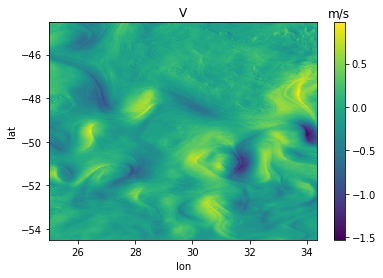

In [80]:
V = np.load(PATH_SNAP+'V.npy')
plt.pcolor(lon[:-50],lat,V[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('V')
plt.savefig(PATH_SNAP+'figures/V.png')

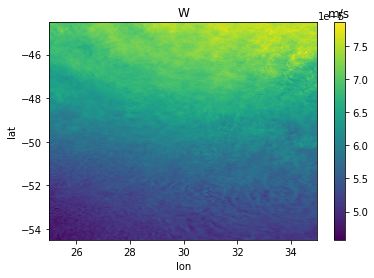

In [59]:
W = np.load(PATH_SNAP+'W.npy')
plt.pcolor(lon,lat,W)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('W')
plt.savefig(PATH_SNAP+'figures/W.png')

## Filtered high reolution fields: surface and averaged over MLD

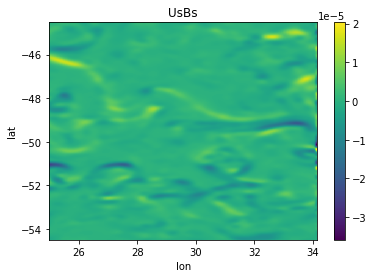

In [4]:
UsBs = np.load(PATH_SNAP+'UsBs.npy')
plt.pcolor(lon[:-40],lat,UsBs.transpose()[:,:-40])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
plt.title('UsBs')
plt.savefig(PATH_SNAP+'figures/UsBs.png')

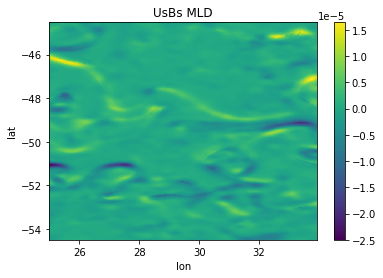

In [30]:
UsBs_MLD = np.load(PATH_SNAP+'UsBs_MLD.npy')
plt.pcolor(lon[:-50],lat,UsBs_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
plt.title('UsBs MLD')
plt.savefig(PATH_SNAP+'figures/UsBs_MLD.png')

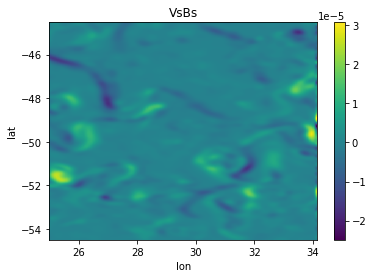

In [5]:
VsBs = np.load(PATH_SNAP+'VsBs.npy')
plt.pcolor(lon[:-40],lat,VsBs.transpose()[:,:-40])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
plt.title('VsBs')
plt.savefig(PATH_SNAP+'figures/VsBs.png')

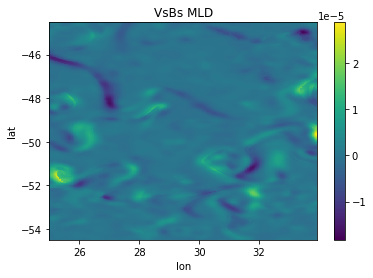

In [31]:
VsBs_MLD = np.load(PATH_SNAP+'VsBs_MLD.npy')
plt.pcolor(lon[:-50],lat,VsBs_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
plt.title('VsBs MLD')
plt.savefig(PATH_SNAP+'figures/VsBs_MLD.png')

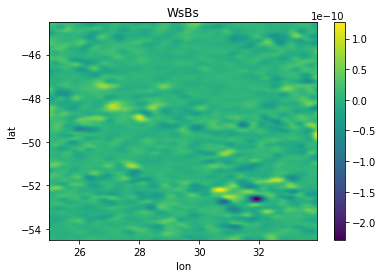

In [7]:
WsBs = np.load(PATH_SNAP+'WsBs.npy')
plt.pcolor(lon[:-50],lat,WsBs.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
plt.title('WsBs')
plt.savefig(PATH_SNAP+'figures/WsBs.png')

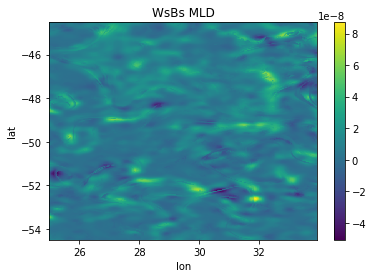

In [32]:
WsBs_MLD = np.load(PATH_SNAP+'WsBs_MLD.npy')
plt.pcolor(lon[:-50],lat,WsBs_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
plt.title('WsBs MLD')
plt.savefig(PATH_SNAP+'figures/WsBs_MLD.png')

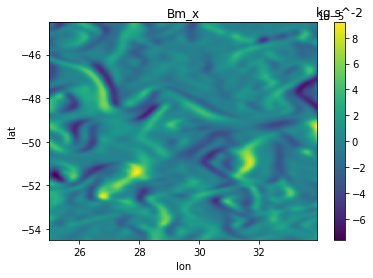

In [8]:
Bm_x = np.load(PATH_SNAP+'Bm_x.npy')
plt.pcolor(lon[:-50],lat,Bm_x.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg s^-2')
plt.title('Bm_x')
plt.savefig(PATH_SNAP+'figures/Bm_x.png')

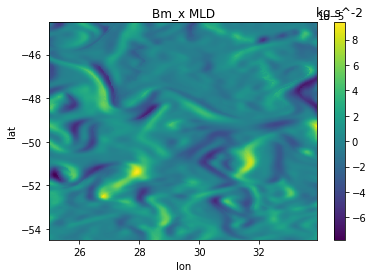

In [33]:
Bm_x_MLD = np.load(PATH_SNAP+'Bm_x_MLD.npy')
plt.pcolor(lon[:-50],lat,Bm_x_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg s^-2')
plt.title('Bm_x MLD')
plt.savefig(PATH_SNAP+'figures/Bm_x_MLD.png')

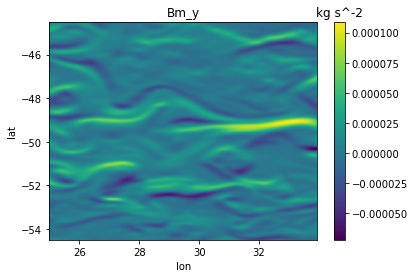

In [9]:
Bm_y = np.load(PATH_SNAP+'Bm_y.npy')
plt.pcolor(lon[:-50],lat,Bm_y.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg s^-2')
plt.title('Bm_y')
plt.savefig(PATH_SNAP+'figures/Bm_y.png')

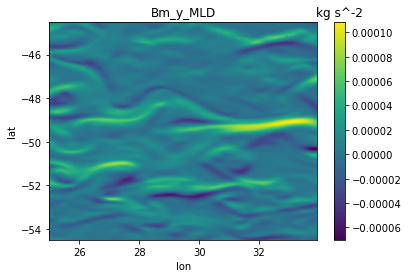

In [34]:
Bm_y_MLD = np.load(PATH_SNAP+'Bm_y_MLD.npy')
plt.pcolor(lon[:-50],lat,Bm_y_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg s^-2')
plt.title('Bm_y_MLD')
plt.savefig(PATH_SNAP+'figures/Bm_y_MLD.png')

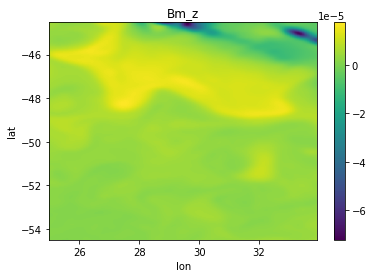

In [10]:
Bm_z = np.load(PATH_SNAP+'Bm_z.npy')
plt.pcolor(lon[:-50],lat,Bm_z.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('kg s^-2')
plt.title('Bm_z')
plt.savefig(PATH_SNAP+'figures/Bm_z.png')

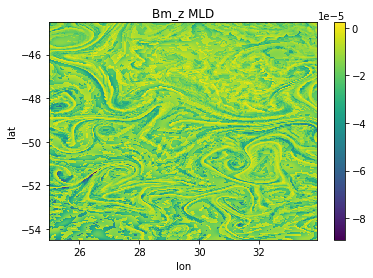

In [35]:
Bm_z_MLD = np.load(PATH_SNAP+'Bm_z_MLD.npy')
plt.pcolor(lon[:-50],lat,Bm_z_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('kg s^-2')
plt.title('Bm_z MLD')
plt.savefig(PATH_SNAP+'figures/Bm_z_MLD.png')

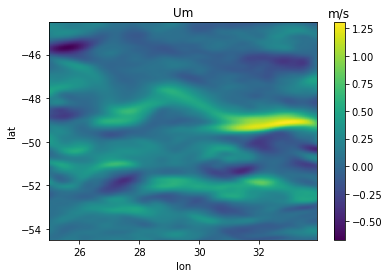

In [20]:
Um = np.load(PATH_SNAP+'Um.npy')
plt.pcolor(lon[:-50],lat,Um.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Um')
plt.savefig(PATH_SNAP+'figures/Um.png')

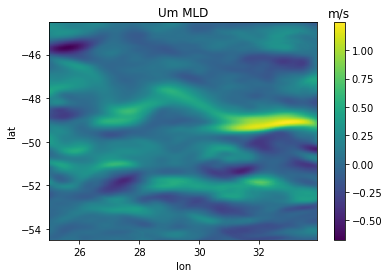

In [24]:
Um_MLD = np.load(PATH_SNAP+'Um_MLD.npy')
plt.pcolor(lon[:-50],lat,Um_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Um MLD')
plt.savefig(PATH_SNAP+'figures/Um_MLD.png')

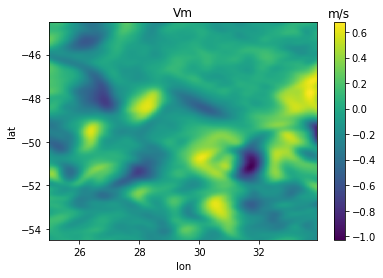

In [15]:
Vm = np.load(PATH_SNAP+'Vm.npy')
plt.pcolor(lon[:-50],lat,Vm.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Vm')
plt.savefig(PATH_SNAP+'figures/Vm.png')

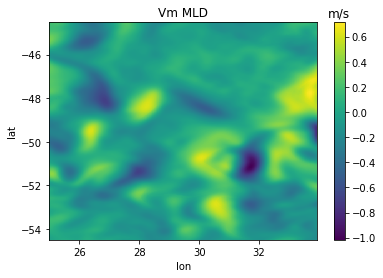

In [17]:
Vm_MLD = np.load(PATH_SNAP+'Vm_MLD.npy')
plt.pcolor(lon[:-50],lat,Vm_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Vm MLD')
plt.savefig(PATH_SNAP+'figures/Vm_MLD.png')

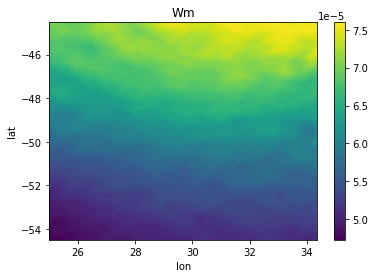

In [77]:
Wm = np.load(PATH_SNAP+'Wm.npy')
plt.pcolor(lon[:-50],lat,Wm.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Wm')
plt.savefig(PATH_SNAP+'figures/Wm.png')

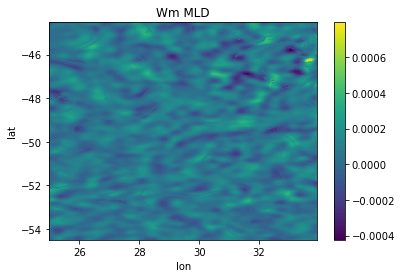

In [18]:
Wm_MLD = np.load(PATH_SNAP+'Wm_MLD.npy')
plt.pcolor(lon[:-50],lat,Wm_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Wm MLD')
plt.savefig(PATH_SNAP+'figures/Wm_MLD.png')

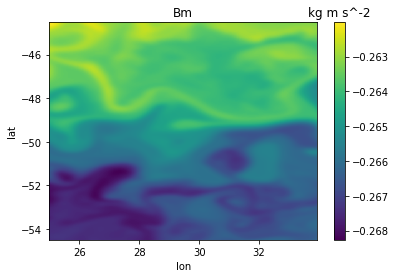

In [26]:
Bm = np.load(PATH_SNAP+'Bm.npy')
plt.pcolor(lon[:-50],lat,Bm.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg m s^-2')
plt.title('Bm')
plt.savefig(PATH_SNAP+'figures/Bm.png')

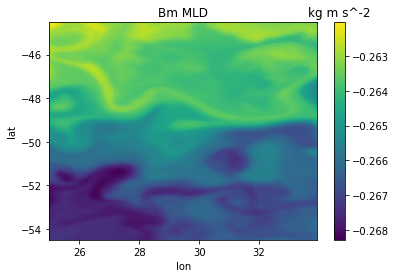

In [28]:
Bm_MLD = np.load(PATH_SNAP+'Bm_MLD.npy')
plt.pcolor(lon[:-50],lat,Bm_MLD.transpose()[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg m s^-2')
plt.title('Bm MLD')
plt.savefig(PATH_SNAP+'figures/Bm_MLD.png')

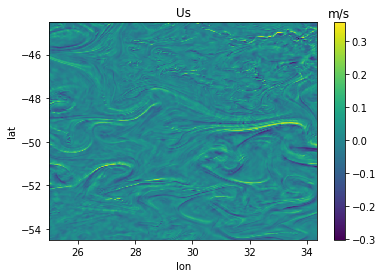

In [85]:
Us = np.load(PATH_SNAP+'Us.npy')
plt.pcolor(lon[:-50],lat,Us[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Us')
plt.savefig(PATH_SNAP+'figures/Us.png')

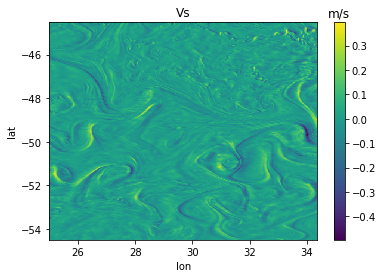

In [86]:
Vs = np.load(PATH_SNAP+'Vs.npy')
plt.pcolor(lon[:-50],lat,Vs[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Vs')
plt.savefig(PATH_SNAP+'figures/Vs.png')

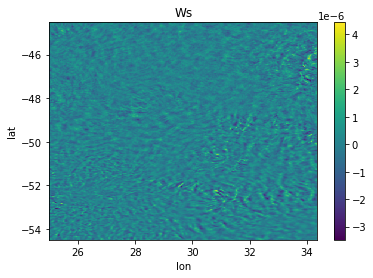

In [87]:
Ws = np.load(PATH_SNAP+'Ws.npy')
plt.pcolor(lon[:-50],lat,Ws[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Ws')
plt.savefig(PATH_SNAP+'figures/Ws.png')

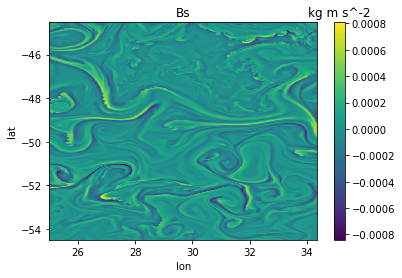

In [88]:
Bs = np.load(PATH_SNAP+'Bs.npy')
plt.pcolor(lon[:-50],lat,Bs[:,:-50])
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg m s^-2')
plt.title('Bs')
plt.savefig(PATH_SNAP+'figures/Bs.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Bm_MLD_lowres.npy'

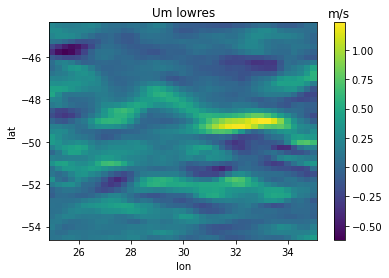

In [21]:
Um_lowres = np.load('Um_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,Um_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Um lowres')
plt.savefig('figures/Um_lowres.png')

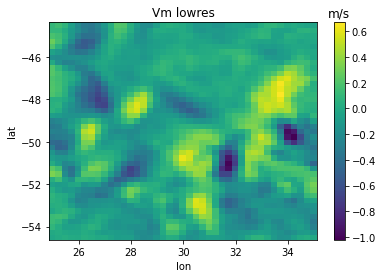

In [25]:
Vm_lowres = np.load('Vm_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,Vm_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Vm lowres')
plt.savefig('figures/Vm_lowres.png')

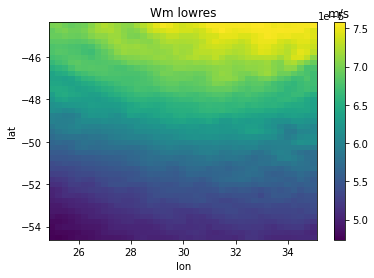

In [24]:
Wm_lowres = np.load('Wm_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,Wm_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('m/s')
plt.title('Wm lowres')
plt.savefig('figures/Wm_lowres.png')

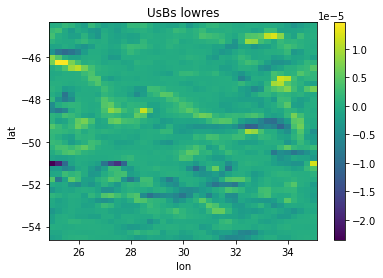

In [26]:
UsBs_lowres = np.load('UsBs_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,UsBs_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('UsBs lowres')
plt.savefig('figures/UsBs_lowres.png')

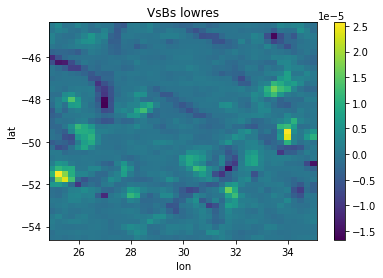

In [27]:
VsBs_lowres = np.load('VsBs_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,VsBs_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('VsBs lowres')
plt.savefig('figures/VsBs_lowres.png')

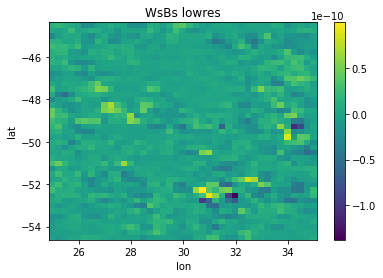

In [28]:
WsBs_lowres = np.load('WsBs_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,WsBs_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('WsBs lowres')
plt.savefig('figures/WsBs_lowres.png')

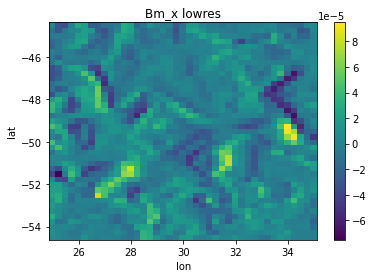

In [29]:
Bm_x_lowres = np.load('Bm_x_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,Bm_x_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('m/s')
plt.title('Bm_x lowres')
plt.savefig('figures/Bm_x_lowres.png')

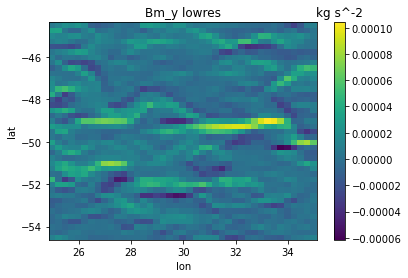

In [31]:
Bm_y_lowres = np.load('Bm_y_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,Bm_y_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
clb.ax.set_title('kg s^-2')
plt.title('Bm_y lowres')
plt.savefig('figures/Bm_y_lowres.png')

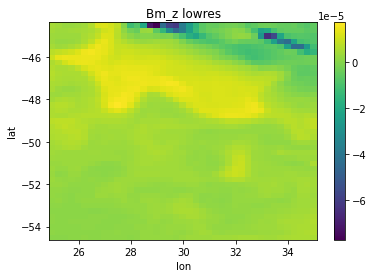

In [2]:
Bm_z_lowres = np.load('Bm_z_lowres.npy')
plt.pcolor(lat_lowres,lon_lowres,Bm_z_lowres)
plt.xlabel('lon')
plt.ylabel('lat')
clb = plt.colorbar()
#clb.ax.set_title('kg s^-2')
plt.title('Bm_z lowres')
plt.savefig('figures/Bm_z_lowres.png')